<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Chemical modelling: Calcium flux rates
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss the **dissolution and dissociation of carbon dioxide**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geodyn_chem as chem
import geodyn_div;geodyn_div.change_fonts()

In [2]:
R        = 8.314   # Gas constant, Pa m3 / K / mol
atm2Pa   = 101325. # 1 atm = 101325 Pa
liter2m3 = 1.e-3   # 1 l   = 1000 cm3 = 10^-3 m3 
year2sec = 365*24*60*60
day2sec  = 24*60*60
min2sec  = 60
tiny     = 1e-20

----
## Calcite dissolution

Along the interface solution-rock calcite is dissolved physically [e.g. Plummer et al., 1978]
$$
\begin{array}{rcl}
  {\rm CaCO}_3 + {\rm H}^+             
  & \overset{\kappa_1}{\underset{\kappa'_4}{\leftrightarrow}} & {\rm Ca}^{2+} + {\rm HCO}_3^- \\
  {\rm CaCO}_3 + {\rm H}_2{\rm CO}_3^0 
  & \overset{\kappa_2}{\underset{\kappa''_4}{\leftrightarrow}} & {\rm Ca}^{2+} + 2{\rm HCO}_3^- \\
  {\rm CaCO}_3 + {\rm H}_2{\rm O}      
  & \overset{\kappa_3}{\underset{\kappa'''_4}{\leftrightarrow}} & {\rm Ca}^{2+} + {\rm CO}_3^{2-} 
\end{array}
$$
Here, the $\kappa_i$ are rate coefficients.

- The first process is dissolution due to the presence of H$^+$ in a strongly acidic environment, 
- The second process is a direct reaction of calcite with the carbonic acid H$_2$CO$_3$, 
- The third process describes the physical dissolution of calcite in water. 

For pH-values larger than six, which is true for natural karst waters, the second reaction is negligible. 
For CO$_2$-pressures smaller than 0:01 atm, the third reaction is the dominant reaction. 

The calcite dissolution as a **fairly slow process** is also rate-limiting.

----
## PWP equation
The calcium flux rate $F_{Ca^{2+}}$ [mol/m$^2$/s] has been determined experimentally by
measuring the dissolution rate of Iceland spar in large volumes of a rigorously stirred, turbulent solution
by Plummer et al. [1978]. From their experimental results, Plummer et al derived as analytical approximation 
the **PWP equation**:
$$
F_{Ca^{2+}} =
\kappa_1 \left( \rule[-2mm]{0cm}{6mm} {\rm H}^+ \right)_{\delta}
+ \kappa_2 \left( \rule[-2mm]{0cm}{6mm} {\rm H}_2{\rm CO}_3^* \right)_{\delta}
+ \kappa_3 
- \kappa_4 \left( \rule[-2mm]{0cm}{6mm} {\rm Ca}^{2+} \right)_{\delta} \left( {\rm HCO}_3^- \right)_{\delta}
$$
Here, $(X_i)$ indicates activities of $X_i$, and the sub-script $\delta$ the interface solid-fluid.

In [3]:
def PWP(TC,pco2=0.00042):
    """
    -----------------------------------------------------------------------
    function calculates coefficients of PWP equation
    -----------------------------------------------------------------------
    version tabulated in Buhmann & Dreybrodt (1985)
    input:
    TC               - C
    pco2             - atm
    output:
    kappa1           - m/s
    kappa2           - m/s
    kappa3           - mol/m2/s
    kappa4           - m4/mol/s
    """
    TK = 273.16 + TC
    #-----------------------------------------------------------------------
    # CO_2 equilibrium coefficients
    #-----------------------------------------------------------------------
    kappa1 = 10.**(0.198 - 444./TK)
    kappa2 = 10.**(2.840 - 2177./TK)
    kappa3 = np.where(TC <= 25,
        10.**(-5.860 - 317./TK),
        10.**(-1.100 - 1737./TK))
    kappa4 = np.where(pco2 <= 0.05,
        10.**(-2.375 + 0.025*TC + 0.56*(-np.log10(pco2)-1.3)),
        10.**(-2.375 + 0.025*TC))
    #-----------------------------------------------------------------------
    # convert from original units
    #-----------------------------------------------------------------------
    kappa1 = 1.e-2 * kappa1          # cm/s -> m/s
    kappa2 = 1.e-2 * kappa2          # cm/s -> m/s
    kappa3 = 1.e-3 / 1.e-4 * kappa3  # mmol/cm2/s -> mol/m2/s
    kappa4 = 1.e-8 / 1.e-3 * kappa4  # cm4/mmol/s -> m4/mol/s
    return kappa1,kappa2,kappa3,kappa4

In [4]:
PWP(10)

(0.00042656175873028243,
 1.418297047307627e-07,
 1.0483145047726635e-06,
 1.0913910735377657e-06)

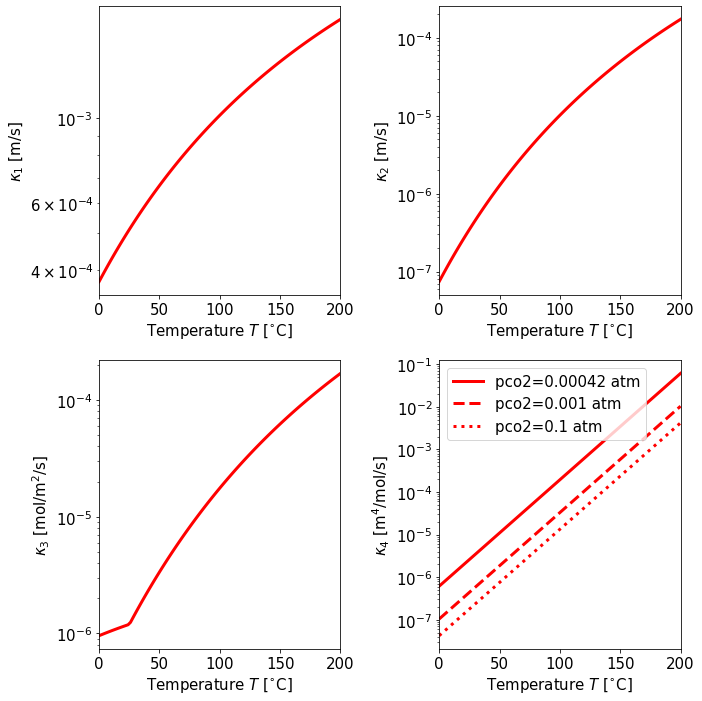

In [5]:
TC = np.linspace(0,200,101)

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].set_xlim(0,200)
axs[0,0].set_xlabel('Temperature $T$ [$^{\circ}$C]')
axs[0,0].set_ylabel('$\kappa_1$ [m/s]')
axs[0,0].semilogy(TC,PWP(TC)[0],linewidth=3,color='red')
axs[0,1].set_xlim(0,200)
axs[0,1].set_xlabel('Temperature $T$ [$^{\circ}$C]')
axs[0,1].set_ylabel('$\kappa_2$ [m/s]')
axs[0,1].semilogy(TC,PWP(TC)[1],linewidth=3,color='red')
axs[1,0].set_xlim(0,200)
axs[1,0].set_xlabel('Temperature $T$ [$^{\circ}$C]')
axs[1,0].set_ylabel('$\kappa_3$ [mol/m$^2$/s]')
axs[1,0].semilogy(TC,PWP(TC)[2],linewidth=3,color='red')
axs[1,1].set_xlim(0,200)
axs[1,1].set_xlabel('Temperature $T$ [$^{\circ}$C]')
axs[1,1].set_ylabel('$\kappa_4$ [m$^4$/mol/s]')
axs[1,1].semilogy(TC,PWP(TC)[3],linewidth=3,color='red',label='pco2=0.00042 atm')
axs[1,1].semilogy(TC,PWP(TC,pco2=0.01)[3],linewidth=3,color='red',linestyle='dashed',label='pco2=0.001 atm')
axs[1,1].semilogy(TC,PWP(TC,pco2=0.1)[3],linewidth=3,color='red',linestyle='dotted',label='pco2=0.1 atm')
axs[1,1].legend()
plt.tight_layout()
plt.savefig('figures/CHEM_kappa.png')

----
## Flux-rate laws

Dissolution experiments of limestone, performed by Buhmann and Dreybrodt [1985a,b], have been fitted 
with a simplified **flux-rate law**:
$$
F_{Ca^{2+}} =
k_i \left( 1  - \frac{[\textrm{Ca}^{2+}]}{[\textrm{Ca}^{2+}]_{eq}} \right)^{n_i}
$$


In [6]:
def FCaCO3 (ca2p,ca2peq,delta=0.01e-2):
    """
    !-----------------------------------------------------------------------
    ! Dreybrodt's (1996) flux relations for calcite 
    ! from: Buhmann,Dreybrodt (1985), Chem. Geol., 53, 109-124
    ! from:
    ! input:
    !   ca2p   - current Ca^2+ concentration [mol/m^3] 
    !   ca2peq - saturation Ca^2+ concentration [mol/m^3]
    !   delta  - radius of conduit [m]
    ! fixed:
    !   k1s    - linear rate constant [mol/m2/s]
    !   n1     - linear power-law exponent [-]
    !   n2     - non-linear power-law exponent [-]
    !   diff   - Diffusion constant [m^2/s]
    !   sw12    - switch for rate law
    ! output:
    !   flux   - Ca^2+ flux rate [mol/m^2/s]  
    !            which depends on saturation, for
    !            [Ca^2+] <= sw12 [Ca^2+]_eq the flux rate is linear
    !            [Ca^2+] >  sw12 [Ca^2+]_eq the flux rate is fourth-order
    !   iflux  - flag for flux law 
    !       1  - linear 
    !       2  - fourth-order
    !       3  - over- saturated
    !       4  - (undefined)
    !-----------------------------------------------------------------------
    """
    # fixed parameter values
    n1     = 1
    n2     = 4
    k1s    = 4.e-7
    diff   = 1.e-9
    sw12   = 0.9
    iflux  = -1
    # correction for diffusion for larger film thicknesses
    k1     = k1s / (1.+k1s*2.*delta/6./diff/ca2peq)
    # low-order linear flux rate
    if ca2p <= sw12*ca2peq:
        iflux = 1
        FCaCO3 = k1 * (1. - ca2p/ca2peq)**n1
    # higher-order non-linear flux rate
    elif ca2p >= sw12*ca2peq and ca2p <= ca2peq:
        iflux = 2
        k2    = k1 * (1. - sw12)**(n1-n2)
        FCaCO3 = k2 * (1. - ca2p/ca2peq)**n2
    # precipitation
    elif ca2p >= ca2peq:
        iflux = 3
        FCaCO3 = -k1 * (ca2p/ca2peq-1.)**n1
    # undefined
    else:
        iflux = 4
        FCaCO3 = 0.
    return FCaCO3

Define temperature and carbon-dioxide range, calculate calcium equilibrium concentration and flux rate,
then plot...

In [7]:
TC   = np.array([10,20])
pco2 = np.array([0.001,0.01,0.1])

c    = np.linspace(0.2,5,201)
ceq  = np.zeros(3*3).reshape(3,3)
F    = np.zeros(len(c)*3*3).reshape(len(c),3,3)
print(c.shape,ceq.shape,F.shape)

for t in range(len(TC)):
    for p in range(len(pco2)):
        ceq[t][p] = chem.CEQ_limestone_open (TC[t],pco2[p])
        for i in range(len(c)):
            F[i][t][p] = FCaCO3(c[i],ceq[t][p])

(201,) (3, 3) (201, 3, 3)


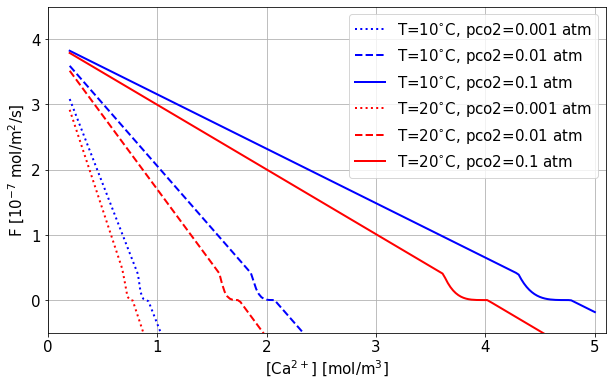

In [8]:
plt.figure(figsize=(10,6))
plt.xlim(0,5.1)
plt.xlabel('[Ca$^{2+}$] [mol/m$^3$]')
plt.ylabel('F [$10^{-7}$ mol/m$^2$/s]')
plt.ylim(-0.5,4.5)
plt.plot(c,F[:,0,0]*1e7,linewidth=2,linestyle='dotted',color='blue',label='T=10$^{\circ}$C, pco2=0.001 atm')
plt.plot(c,F[:,0,1]*1e7,linewidth=2,linestyle='dashed',color='blue',label='T=10$^{\circ}$C, pco2=0.01 atm')
plt.plot(c,F[:,0,2]*1e7,linewidth=2,linestyle='solid', color='blue',label='T=10$^{\circ}$C, pco2=0.1 atm')
plt.plot(c,F[:,1,0]*1e7,linewidth=2,linestyle='dotted',color='red',label='T=20$^{\circ}$C, pco2=0.001 atm')
plt.plot(c,F[:,1,1]*1e7,linewidth=2,linestyle='dashed',color='red',label='T=20$^{\circ}$C, pco2=0.01 atm')
plt.plot(c,F[:,1,2]*1e7,linewidth=2,linestyle='solid', color='red',label='T=20$^{\circ}$C, pco2=0.1 atm')
plt.legend()
plt.grid()
plt.savefig('figures/CHEM_FCaCO3.png')

----
## Literature

- L. N. Plummer, T. M. L. Wigley and D. L. Parkhurst (1978).<br>**The kinetics of calcite dissolution in CO$_2$ -water systems at 5 degrees to 60 degrees C and 0.0 to 1.0 atm CO$_2$**, American Journal of Science February 278 (2) 179-216; 
[doi: 10.2475/ajs.278.2.179](https://doi.org/10.2475/ajs.278.2.179) 

- Buhmann, D., Dreybrodt, W. (1985).<br>**The kinetics of calcite dissolution and precipitation in geologically relevant situations of karst areas. 2. Closed system.** Chemical Geology, 53 (1). 109-124 [doi: 10.1016/0009-2541(85)90024-5](https://doi.org/10.1016/0009-2541(85)90024-5)
- Dreybrodt, Laukner, Svensson, Liu, Buhmann (1996). <br> **The kinetics of the reaction CO$_2$ + H$_2$O → H$^+$ + HCO$_3^−$ as one of the rate limiting steps for the dissolution of calcite in the system H$_2$O-CO$_2$-CaCO$_3$**, Geochim. Cosmochim. Acta, 60(18):3375–3381

----